In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 5.8 MB/s eta 0:00:00


In [175]:
import regex as re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from os import path
import plotly.express as px
from collections import Counter

import emoji
from PIL import Image

In [191]:
def startsWithDateAndTime(s):
                                                                                          # r"([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -" # [\d]{1,2}/[\d]{1,2}/[\d]{4} ^([0-9]+)(\/)([0-9]+)(\/)([0-9]+)
  pattern = r"\[\d{1,2}/\d{1,2}/\d{2},\s\d{1,2}:\d{2}:\d{2}\s?(?:AM|PM)?\]"   # one or two digits day forward slash one or two digits day forward slash four digits year DD/MM/YYYY
  result = re.findall(pattern, s)     # search for all occurrences of the pattern
  if result:
    # print('date and time')
    return True
  else:
    # print('not startsWithDateAndTime')
    return False

In [192]:
def FindAuthor(s):
    s=s.split(":")      # splits into a list of substrings using the colon
    if len(s)==2:
      # print(s)
      return True
    else:
      # print(s)
      return False

In [193]:
def getDataPoint(line):
  # print(line)
  splitLine = line.split(']')   # splits into two parts. first contains the date and time, second contains message content.
  # print("splitLine: ",splitLine)
  dateTime = splitLine[0].strip('[')         #  extracts the date and time
  # print(dateTime)
  date, time = dateTime.split(', ')   # further splits the date and time into 2 separate variables
  date = date.replace('\u200e', '')
  date = date.replace('[', '')
  time = time.replace('\u202f', '')
  # print(date, time)
  message = ' '.join(splitLine[1:])     #  joins together the message content into a single string
  # print(message)
  if FindAuthor(message):
      splitMessage = message.split(': ')      # finds author of message if any in the message content and splits
      # print(splitMessage)
      author = splitMessage[0]                # extracts the author
      # print(author)
      message = ' '.join(splitMessage[1:])      # contains only the actual message content
      # print(message)
  else:
      author = None
  return date, time, author, message


In [194]:
from google.colab import files

# uploaded = files.upload()
parsedData = []                                                                        # List to keep track of data so it can be used by a Pandas dataframe
conversation = "/content/drive/MyDrive/WhatsApp Chat - siddharth rana 2/_chat.txt"    # path for the whatsapp chat text file
with open(conversation, encoding="utf-8") as fp:                                     #opens the text file for reading
    fp.readline()                                                                       # reads and skip first line because it contains information about end-to-end encryption
    # print("fp.readline() : \n", fp.readline())
    messageBuffer = []                                                               # initializes an empty list to store lines of messages until a new message begins.
    # print("messageBuffer : \n", messageBuffer)
    date, time, author = None, None, None
    while True:
        line = fp.readline()                                                                #  reads the next line from the file.
        if not line:                                                                    #  checks if the end of the file has been reached
            break                                                                     # it breaks out of the loop.
        line = line.strip()                                                          # removes leading and trailing whitespaces
        # print("line: \n", line)
        if startsWithDateAndTime(line):                                                # checks if the line starts with a date and time stamp, indicating the beginning of a new message
            # print("startsWithDateAndTime : \n", startsWithDateAndTime)
            if len(messageBuffer) > 0:                                                #checks if any lines stored
              # print("previous line ended")
              parsedData.append([date, time, author, ' '.join(messageBuffer)])            # previous message has ended,
              messageBuffer.clear()
              date, time, author, message = getDataPoint(line)                           # extracts the date, time, author, and message content using the getDataPoint() and appends them to the parsedData list
              # print("message: ", message)
              messageBuffer.append(message)
        else:
            messageBuffer.append(line)
print(parsedData)
print(len(parsedData))

[[None, None, None, 'Mca bhi'], ['03/08/23', '8:52:07PM', ' siddharth rana 2', 'Ek chij to karte phle'], ['03/08/23', '8:53:32PM', ' Rksha', 'Koini'], ['03/08/23', '8:53:37PM', ' Rksha', 'Sb imp h'], ['03/08/23', '8:53:49PM', ' siddharth rana 2', 'Ek naon me rakho na paon'], ['03/08/23', '8:53:53PM', ' siddharth rana 2', '2-3mw nahi'], ['03/08/23', '8:58:01PM', ' Rksha', 'Ek nao me rehna mushkil h'], ['03/08/23', '8:59:05PM', ' siddharth rana 2', 'Apni apni soch aur decisin'], ['04/08/23', '6:21:20PM', ' siddharth rana 2', 'Pov bta kuch ...'], ['04/08/23', '6:21:32PM', ' Rksha', 'Kis k liye'], ['04/08/23', '6:21:43PM', ' siddharth rana 2', 'Meri video k lie'], ['04/08/23', '6:21:56PM', ' Rksha', 'Kesi konsi'], ['04/08/23', '6:22:01PM', ' Rksha', 'Btaega tbi to btaungi'], ['04/08/23', '6:24:48PM', ' siddharth rana 2', '\u200eThis message was deleted.'], ['04/08/23', '6:24:53PM', ' siddharth rana 2', 'Bta kaunsi dalu'], ['04/08/23', '6:26:42PM', ' Rksha', 'Tere bad tere bhoot ko staenge'

In [195]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
# df["Date"] = pd.to_datetime(df["Date"])

In [196]:
df[:5]
# df.head(20)

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")
/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Date,Time,Author,Message
0,None,None,None,Mca bhi
1,03/08/23,8:52:07PM,siddharth rana 2,Ek chij to karte phle
2,03/08/23,8:53:32PM,Rksha,Koini
3,03/08/23,8:53:37PM,Rksha,Sb imp h
4,03/08/23,8:53:49PM,siddharth rana 2,Ek naon me rakho na paon


In [197]:
df= df[1:]
df

,Date,Time,Author,Message
1,03/08/23,8:52:07PM,siddharth rana 2,Ek chij to karte phle
2,03/08/23,8:53:32PM,Rksha,Koini
3,03/08/23,8:53:37PM,Rksha,Sb imp h
4,03/08/23,8:53:49PM,siddharth rana 2,Ek naon me rakho na paon
5,03/08/23,8:53:53PM,siddharth rana 2,2-3mw nahi
...,...,...,...,...
2362,08/04/24,8:52:05PM,siddharth rana 2,Mai to hun hi garib but ti alag level ki hai
2363,09/04/24,6:48:51AM,Rksha,Khrche he khrche h bhae
2364,09/04/24,6:48:54AM,Rksha,Bchne kidr se
2365,09/04/24,6:49:07AM,Rksha,Ek chez ni la pari khrcho k chkr me


In [206]:
# df["Date"].unique()

In [199]:
df["Date"] = pd.to_datetime(df["Date"])

<ipython-input-199-cc2372053ca6>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])
<ipython-input-199-cc2372053ca6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df["Date"])


In [200]:
df.Author.unique()

array([' siddharth rana 2', ' Rksha', None], dtype=object)

In [201]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]                    #count the number of rows where the 'Message' column contains '<Media omitted>', indicating media messages.
# print(media_messages)

def split_count(text):
    data = re.findall(r'\X', text)                                                    # finds all Unicode characters in the input text
    emoji_list = []
    for word in data:
      emojis = emoji.distinct_emoji_list(word)                                          # return a list of distinct emojis
    emoji_list.extend([emoji.demojize(is_emoji) for is_emoji in emojis])                    # convert each emoji into textual representations & adds it to the emoji_list
    return emoji_list

    # emoji_list = []
    # for word in data:
    #   if any(char in emoji.distinct_emoji_list for char in word):
    #     emoji_list.append(word)


df["emoji"] = df["Message"].apply(split_count)                                      # stores the emoji text representation into df column
emojis = sum(df['emoji'].str.len())                                                 # finding the total number of characters in the 'emoji' column.
# print(df['emoji'].count())
# print(emojis)
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)
print("Media:",media_messages)
print("Emojis:",emojis)
print("Links:",links)

Media: 0
Emojis: 167
Links: 89


In [202]:
media_messages_df = df[df['Message'] == '<Media omitted>']

messages_df = df.drop(media_messages_df.index)
messages_df.info()
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = [' Rksha',' siddharth rana 2'] # list of the authors name in the group

for i in range(len(l)):
    # Filtering out messages of particular user
    req_df= messages_df[messages_df["Author"] == l[i]]
    # req_df will contain messages of only one particular user
    print('\n')
    print(f'Stats of {l[i]} -')
    # shape will print number of rows which indirectly means the number of messages
    print('Messages Sent', req_df.shape[0])
    #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
    words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
    print('Words per message', words_per_message)
    #media conists of media messages
    media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
    print('Media Messages Sent', media)
    # emojis conists of total emojis
    emojis = sum(req_df['emoji'].str.len())
    print('Emojis Sent', emojis)
    #links consist of total links
    links = sum(req_df["urlcount"])
    print('Links Sent', links)
    # print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2366 entries, 1 to 2366
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2366 non-null   datetime64[ns]
 1   Time      2366 non-null   object        
 2   Author    2233 non-null   object        
 3   Message   2366 non-null   object        
 4   emoji     2366 non-null   object        
 5   urlcount  2366 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 111.0+ KB


Stats of  Rksha -
Messages Sent 1167
Words per message 3.943444730077121
Media Messages Sent 0
Emojis Sent 41
Links Sent 1


Stats of  siddharth rana 2 -
Messages Sent 1066
Words per message 4.428705440900563
Media Messages Sent 0
Emojis Sent 126
Links Sent 0


In [203]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
    print(i)

(':face_with_tears_of_joy:', 99)
(':rolling_on_the_floor_laughing:', 19)
(':smirking_face:', 9)
(':red_heart:', 7)
(':slightly_smiling_face:', 5)
(':unamused_face:', 4)
(':winking_face:', 2)
(':melting_face:', 2)
(':diya_lamp:', 2)
(':grinning_cat:', 2)
(':face_holding_back_tears:', 1)
(':smiling_face_with_tear:', 1)
(':sparkling_heart:', 1)
(':face_with_raised_eyebrow:', 1)
(':money_with_wings:', 1)
(':grinning_squinting_face:', 1)
(':cherry_blossom:', 1)
(':squinting_face_with_tongue:', 1)
(':beaming_face_with_smiling_eyes:', 1)
(':broken_heart:', 1)
(':folded_hands_light_skin_tone:', 1)
(':alien:', 1)
(':crying_face:', 1)
(':oncoming_fist:', 1)
(':face_with_steam_from_nose:', 1)
(':cat_with_wry_smile:', 1)


There are 52087 words in all the messages.


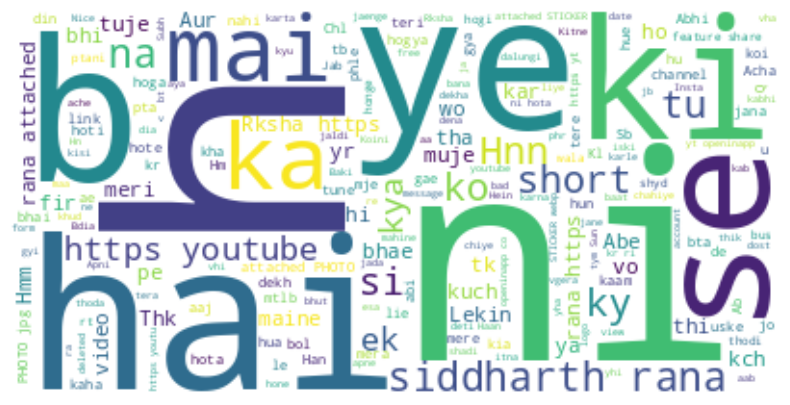

In [204]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Author name  Rksha


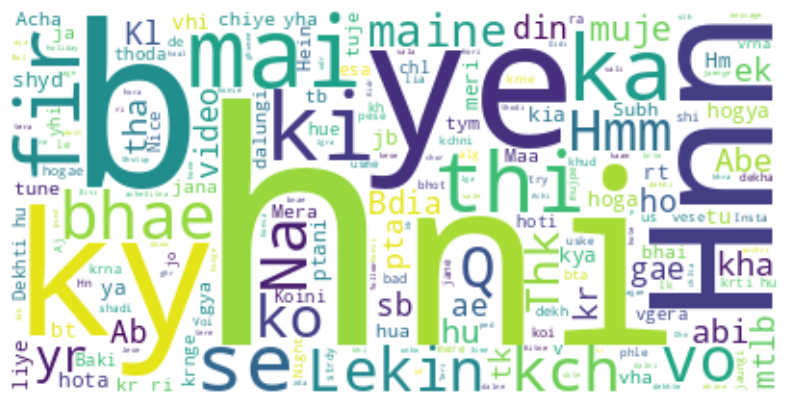

Author name  siddharth rana 2


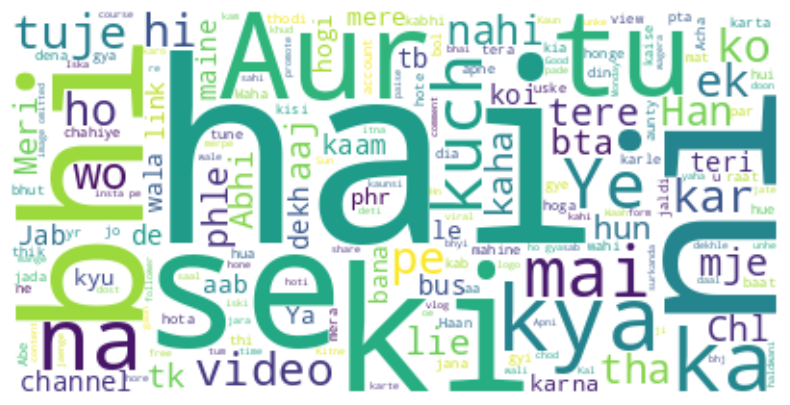

In [205]:
l = [' Rksha',' siddharth rana 2']
for i in range(len(l)):
    dummy_df = messages_df[messages_df['Author'] == l[i]]
    text = " ".join(review for review in dummy_df.Message)
    stopwords = set(STOPWORDS)
    #Generate a word cloud image
    print('Author name',l[i])
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    #Display the generated image
    plt.figure( figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()